# Running LLMs Locally with Ollama in Google Colab

Welcome! This notebook will guide you through the process of setting up and running powerful Large Language Models (LLMs) right here in this Colab environment using a fantastic tool called [Ollama](https://ollama.com/).

**What is Ollama?**

Ollama is a tool that makes it incredibly easy to download, run, and manage open-source LLMs like Llama 3, Phi-3, and more on your own machine (or in this case, a Colab notebook). It handles all the complex setup, allowing you to focus on interacting with the models.

**What to Expect (40-Minute Agenda):**
*   **Part 1 (10 mins):** Setup and Installation
*   **Part 2 (15 mins):** Basic LLM Interaction (Generation & Chat)
*   **Part 3 (10 mins):** Multimodality & Model Customization
*   **Part 4 (5 mins):** Wrap-up and Resources

**Assistance**

If you get stuck, please ask an assistant or use the gemini interface at the bottom of the screen!

## Part 1: Setup and Installation

Let's start by installing Ollama on our Colab instance. We'll use a `curl` command to download and run the installation script. This is the standard way to install Ollama on Mac or Linux.

In [1]:
# Install Ollama
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


Ollama runs as a background server. In a standard terminal, you would just run `ollama serve`. However, in Colab, running it directly would block the notebook from executing other cells.

To get around this, we'll use Python's `threading` and `subprocess` modules to start the Ollama server in a separate thread. This lets it run in the background so we can continue with our notebook.

In [2]:
import threading
import subprocess
import time

def run_ollama_serve():
  """Starts the Ollama server as a background process."""
  command = "ollama serve"
  # Using subprocess.Popen to run the command in the background
  process = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  # You can optionally print the output for debugging
  # for line in iter(process.stdout.readline, b''):
  #   print(line.decode('utf-8'), end='')

# Start the Ollama server in a new thread
ollama_thread = threading.Thread(target=run_ollama_serve)
ollama_thread.start()

# Give the server a moment to start up
time.sleep(5)
print("Ollama server started.")

Ollama server started.


## Part 2: Basic LLM Interaction

With the server running, we can now download a model from the [Ollama Model Library](https://ollama.com/library).

For our first model, let's use `phi3:mini`. It's a powerful yet small model, which makes it fast to download and run. We use the `ollama pull` command for this.

Some actions take a while, so [read this while you are waiting](https://www.ibm.com/think/topics/multimodal-llm)

In [3]:
!ollama pull llama3.2:1b

To interact with our running Ollama server using Python, we'll install the official `ollama` Python library. This library provides a simple and convenient way to send prompts and receive responses.

In [4]:
!pip install ollama

Now for the fun part! Let's generate some text. We'll import the `ollama` library and use the `generate` function. We just need to specify the model we want to use and provide a prompt.

In [5]:
import ollama

response = ollama.generate(
    model='llama3.2:1b',
    prompt='Why is the sky blue?'
)

print(response['response'])

The sky appears blue to us because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh. He discovered that when light travels through a gas such as air, it scatters in all directions, but the shorter, blue wavelengths are scattered more than the longer, red wavelengths.

Here's why:

1. **Blue light is scattered**: When sunlight enters Earth's atmosphere, it consists of a wide range of wavelengths, including all colors. However, the shorter wavelengths (like blue and violet) are scattered by the tiny molecules of gases in the atmosphere.
2. **Scattering effect**: The blue light is scattered more than the other colors because it travels through the air at a slightly larger angle than the longer wavelengths. This means that when we look up at the sky, we see most of the scattered blue light reflected back to our eyes.

The reason why blue light scatters so much is due to its smaller wavelength compared to red and orange light. The shorter wavelengt

Ollama also supports conversational chat. The `chat` function allows you to send a series of messages with different roles (`user` and `assistant`) to maintain context. Let's have a short conversation.

In [6]:
chat_history = [
    {'role': 'user', 'content': 'What is the capital of France?'}
]

response = ollama.chat(model='llama3.2:1b', messages=chat_history)

print(response['message']['content'])

# Add the assistant's response to the history
chat_history.append(response['message'])

# Ask a follow-up question
chat_history.append({'role': 'user', 'content': 'What is a famous landmark there?'})

follow_up_response = ollama.chat(model='llama3.2:1b', messages=chat_history)

print("\nFollow-up response:")
print(follow_up_response['message']['content'])

The capital of France is Paris.

Follow-up response:
One of the most famous landmarks in Paris is the Eiffel Tower, also known as La Tour Eiffel. It's an iron lattice tower built for the 1889 World's Fair and standing at an impressive 324 meters tall. It's become synonymous with Paris and one of the most recognizable landmarks in the world.


Some LLMs are **multimodal**, meaning they can understand more than just text, like images! `llava` is a popular model for this. Let's pull the llava model and give it an image to describe.

In [7]:
# Pull the llava model (this may take a few minutes)
!ollama pull llava

--2025-10-29 14:28:59--  https://limaspanishhouse.com/wp-content/uploads/2021/02/peruvian-llama-2-2048x1795.jpg
Resolving limaspanishhouse.com (limaspanishhouse.com)... 50.31.166.21
Connecting to limaspanishhouse.com (limaspanishhouse.com)|50.31.166.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375291 (366K) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>] 366.50K  1.76MB/s    in 0.2s    

2025-10-29 14:29:00 (1.76 MB/s) - ‘sample_image.jpg’ saved [375291/375291]


Verifying downloaded file:
-rw-r--r-- 1 root root 375291 Feb 16  2021 sample_image.jpg

Download successful. Displaying image using Matplotlib:


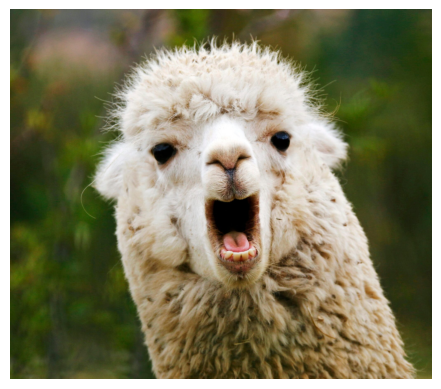

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# --- Step 1: Download a sample image ---
# NOTE: Using a direct URL to an image file is crucial.
# The previous Google link was a redirect and would not download the image correctly.
print("Downloading image...")
!wget -O "sample_image.jpg" "https://limaspanishhouse.com/wp-content/uploads/2021/02/peruvian-llama-2-2048x1795.jpg"

# --- Step 2: Verify the download ---
# Let's check the file size. A non-zero size means it downloaded successfully.
print("\nVerifying downloaded file:")
!ls -l sample_image.jpg

# --- Step 3: Display the image with Matplotlib if it exists ---
file_path = 'sample_image.jpg'
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    print("\nDownload successful. Displaying image using Matplotlib:")
    try:
        # Read the image file
        img = mpimg.imread(file_path)

        # Display the image
        plt.imshow(img)
        plt.axis('off')  # Hide the axes (x and y ticks) for a cleaner look
        plt.show()
    except Exception as e:
        print(f"\n--- ERROR: Could not display the image. It might be corrupted. Error: {e} ---")
else:
    print("\n--- ERROR: Image download failed. The file is missing or empty. ---")

In [ ]:
import ollama
import base64

def image_to_base64(image_path):
  """Converts an image file to a base64 string."""
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

image_b64 = image_to_base64("sample_image.jpg")

response = ollama.chat(
    model='llava',
    messages=[
        {
            'role': 'user',
            'content': 'Describe this image in detail.',
            'images': [image_b64]
        }
    ]
)

print(response['message']['content'])

You can create custom versions of models using a `Modelfile`. This allows you to set a specific persona or system prompt. Let's create a "pirate" version of `llama3.2B`.

Note: This is the same as changing the system prompt on a website like chatgpt.com, just locally. This is what is happening under the hood.


In [ ]:
# # Define the Modelfile content
# modelfile_content = """
# FROM llama3.2:3b
# SYSTEM "You are a friendly pirate. All your responses must be in the style of a pirate."
# """

# # Write the Modelfile
# with open("Modelfile", "w") as f:
#     f.write(modelfile_content)

# # Create the custom model
# !ollama create pirate-llama -f Modelfile

# print("\nCustom model 'pirate-llama' created!")

# # Now, let's chat with our pirate
# response = ollama.chat(
#     model='pirate-llama',
#     messages=[{'role': 'user', 'content': 'What is the best thing about being a pirate?'}]
# )

# print("\nPirate Response:")
# print(response['message']['content'])

## Part 4: Conclusion & Further Exploration

Congratulations! You've successfully set up Ollama in Colab, generated text, chatted with a model, analyzed an image, and even created your own custom model.

**Recap:**
*   We installed and ran the Ollama server.
*   We pulled models like `llama3.2B` and `llava`.
*   We used the `ollama` Python library to `generate` and `chat`.
*   We explored multimodal capabilities with `llava`.
*   We created a custom persona with a `Modelfile`.

**Where to go from here?**
*   **Explore more models:** Check out the full [Ollama Library](https://ollama.com/library).
*   **A research level explanation of transformers** [The Visual Transformer](https://jalammar.github.io/illustrated-transformer/)
*   **The original transformer paper** [Attention Is All You Need](https://arxiv.org/abs/1706.03762)
*   **Build an LLM from scratch** [Transformer from Scratch](https://arena-ch1-transformers.streamlit.app/[1.1]_Transformer_from_Scratch)

*   **Build an App:** Try integrating Ollama into a simple web application using Flask or Streamlit.

## Extension: Understanding Text with Embeddings

So far, we've used LLMs to generate text. But they can also be used to *understand* text. One of the most powerful ways to do this is by creating **embeddings**.

**What is an Embedding?**

An embedding is a list of numbers (a vector) that represents the meaning and context of a piece of text. Think of it like a coordinate on a giant "meaning map." Texts with similar meanings will have coordinates that are very close to each other.

We can use this to build a simple **semantic search** engine. Instead of matching keywords, it matches *meaning*.

**Our Goal:**
1. Create a small "database" of sentences.
2. Convert these sentences into embeddings (numbers).
3. Ask a question and convert it into an embedding.
4. Find which sentence in our database is "closest" in meaning to our question.

In [ ]:
!pip install -q scipy

In [ ]:
import ollama
import numpy as np
from scipy.spatial.distance import cosine

# --- Step 1: Create our "database" of sentences ---
documents = [
    "The sun is the center of our solar system.",
    "Lions are the kings of the jungle.",
    "Photosynthesis is the process by which plants use sunlight to create food.",
    "The stock market saw a significant downturn last week.",
    "To make a good pasta, you must use high-quality ingredients."
]

# --- Step 2: Convert each sentence into an embedding ---
# We'll use a special model optimized for creating embeddings. `mxbai-embed-large` is a great choice.
print("Pulling the embedding model (mxbai-embed-large)...")
!ollama pull mxbai-embed-large

print("\nGenerating embeddings for our documents...")
doc_embeddings = []
for doc in documents:
    response = ollama.embeddings(model='mxbai-embed-large', prompt=doc)
    doc_embeddings.append(response['embedding'])
print("Embeddings created successfully.")


# --- Step 3: Ask a question and create an embedding for it ---
query = "What do plants eat?"
print(f"\nQuery: '{query}'")

query_embedding_response = ollama.embeddings(model='mxbai-embed-large', prompt=query)
query_embedding = query_embedding_response['embedding']


# --- Step 4: Find the most similar document ---
# We'll use cosine similarity. A smaller cosine distance means the texts are more similar.
similarities = []
for doc_emb in doc_embeddings:
    # Calculate cosine distance (1 - similarity). We want the smallest distance.
    distance = cosine(query_embedding, doc_emb)
    similarities.append(distance)

# Find the index of the document with the smallest distance
most_similar_index = np.argmin(similarities)

print(f"\nMost relevant document found: '{documents[most_similar_index]}'")
print(f"(Cosine Distance: {similarities[most_similar_index]:.4f})")